In [78]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [84]:
mnist = fetch_openml("mnist_784", version = 1, cache = True, as_frame = False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [85]:
#Förbreda data samt träning och test split
X = mnist["data"]
y = mnist["target"].astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (56000, 784)
Y_train: (56000,)
X_test:  (14000, 784)
Y_test:  (14000,)


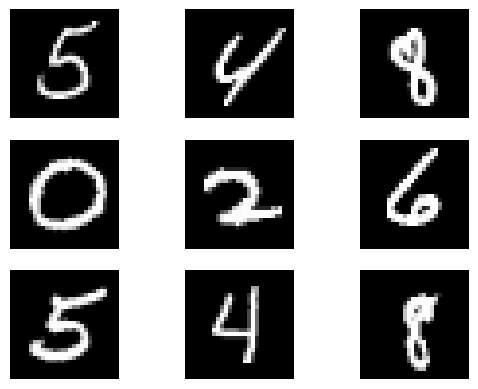

In [56]:
X_train_2d = X_train.reshape(-1, 28, 28)

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_2d[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')  
plt.show()

# LogisticRegression

In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

C:\Users\Nices\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [13]:
#Prediktion 
predict_logreg = log_reg.predict(X_test)

In [14]:
#Beräkning av noggrannhet
accuracy = accuracy_score(y_test, predict_logreg)
print("logistisk regression:", accuracy)
##Olika precision 
print("Classification report for Logistic Regression:")
print(classification_report(y_test, predict_logreg))

logistisk regression: 0.9161428571428571
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.90      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.86      0.88      1273
           6       0.94      0.95      0.94      1396
           7       0.93      0.94      0.93      1503
           8       0.89      0.87      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



In [18]:
rmse_log_reg = np.sqrt(mean_squared_error(y_test, predict_logreg))
print("RMSE for Logistic Regression:", rmse_log_reg)

RMSE for Logistic Regression: 1.1887568536680901


# Random forest

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
###Prediktion
pred_rf = rf.predict(X_test)

In [28]:
###Resultat
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Random Forest:", accuracy_rf)

Random Forest: 0.9672857142857143


In [29]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:")
print(rf_cv_scores)

Cross-Validation Scores for Random Forest:
[0.96607143 0.96785714 0.96883929 0.96705357 0.96553571]


In [27]:
rmse_rf_reg = np.sqrt(mean_squared_error(y_test, pred_rf))
print("RMSE for Random Forest:", rmse_rf_reg)

RMSE for Random Forest: 0.7780929066818252


# Utvärdera validering set

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

In [122]:
y_pred_linear = lin_clf.predict(X_val_scaled)
print("Noggranhet:",accuracy_score(y_val, y_pred_linear))

Noggranhet: 0.844


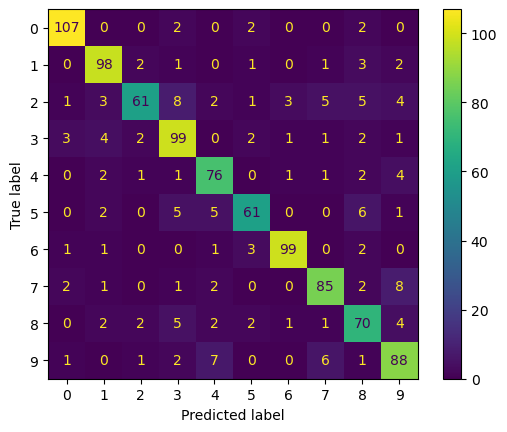

In [123]:
display_confusion_matrix(y_val, y_pred_linear)

# Gridsearch

In [105]:
svm_clf = SVC()

In [106]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(svm_clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

In [108]:
print("Utvald parametrn:", grid_search.best_params_)
print("cross-validation score:", grid_search.best_score_)
print("estimator:", grid_search.best_estimator_)

Utvald parametrn: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
cross-validation score: 0.9066004326145576
estimator: SVC(C=0.1, gamma=0.1, kernel='linear')


In [109]:
##I en tabell
pd.DataFrame(gs_svm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,11.552792,0.156096,4.912414,0.600224,0.5,1,rbf,"{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
1,4.859379,0.935955,1.370592,0.117268,0.5,1,poly,"{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
2,9.956006,0.368401,3.986330,0.009406,0.5,2,rbf,"{'C': 0.5, 'gamma': 2, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
3,4.342746,0.541577,1.463194,0.302193,0.5,2,poly,"{'C': 0.5, 'gamma': 2, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
4,9.949883,0.072010,4.081072,0.127218,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
5,4.379178,0.529334,1.468405,0.309289,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
6,9.601908,0.596389,4.428746,0.229226,1,2,rbf,"{'C': 1, 'gamma': 2, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
7,4.300245,0.373008,1.478800,0.229005,1,2,poly,"{'C': 1, 'gamma': 2, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1
8,9.581093,0.362620,4.179524,0.177489,1.5,1,rbf,"{'C': 1.5, 'gamma': 1, 'kernel': 'rbf'}",0.112777,0.112178,0.112845,0.112600,0.000300,7
9,4.412319,0.130108,1.379894,0.162499,1.5,1,poly,"{'C': 1.5, 'gamma': 1, 'kernel': 'poly'}",0.910618,0.943011,0.933373,0.929001,0.013581,1


In [115]:
y_pred_gs_svm = gs_svm.predict(X_val_scaled)

In [118]:
print("Noggranhet:",accuracy_score(y_val, y_pred_gs_svm))

Noggranhet: 0.94


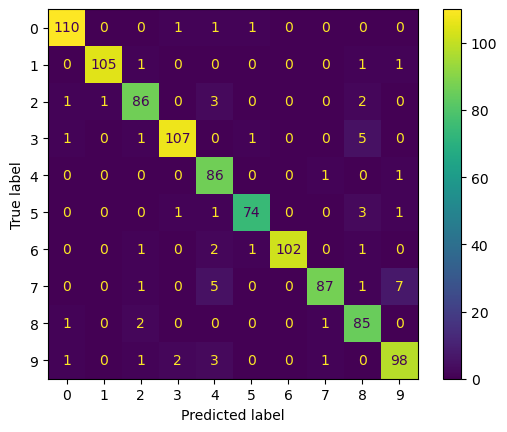

In [112]:
display_confusion_matrix(y_val, y_pred_gs_svm)

# Utvärdering av test data

In [119]:
y_pred_test = gs_svm.predict(X_test_scaled)

In [120]:
print("Noggranhet:", accuracy_score(y_test, y_pred_test))

Noggranhet: 0.939


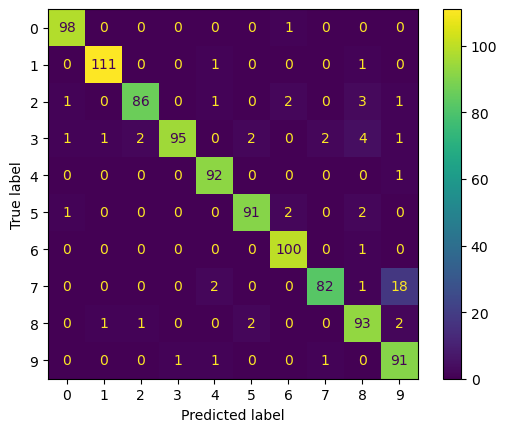

In [121]:
display_confusion_matrix(y_test, y_pred_test)